## Objective

I wanted to explore the effect that different amounts of increasing genes and differing strengths of the increasing genes have on the scores in growth screens.

In [1]:
using DataFrames
using Gadfly
using ColorBrewer

In [2]:
# df = readtable("../data/test_17c6a3d_dirty.csv")
df = readtable("bigiron_growth_sensitivity_to_lib_49b2f59_clean.csv")
head(df)

,measure,score,num_genes,coverage,representation,moi,seq_depth,bottleneck_representation,num_bottlenecks,noise,frac_hq,mean_hq_kd,frac_inc,frac_dec,cent_inc_phenotype,relationships,crisprtype,run_idx
1,inc,0.06020381257093152,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,1
2,inc,0.2276457759409211,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,2
3,inc,0.10604274469914624,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,3
4,inc,0.22750659291135192,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,4
5,inc,0.08822893395390556,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,5
6,inc,0.08335054245099988,500,5,100,0.25,100,100,1,0.01,0.9,0.9,0.02,0.1,0.1,linearsigmoidal,CRISPRi,6


In [3]:
df[:weight_increasing] = df[:cent_inc_phenotype] .* 10 .* df[:frac_inc];

In [5]:
grouped_info = by(df, [:measure, :cent_inc_phenotype, :frac_inc, :crisprtype, :num_bottlenecks]) do grouped_df
    n = size(grouped_df, 1)
    mean_score = clamp(mean(grouped_df[:score]), 0, 1)
    std_score = std(grouped_df[:score])
    conf_int = 1.96 * std_score./sqrt(n)
    DataFrame(
        std_score = std_score,
        mean_score = mean_score,
        score_max = mean_score + conf_int,
        score_min = mean_score - conf_int,
        n = n
    )
end
head(grouped_info)

,measure,cent_inc_phenotype,frac_inc,crisprtype,num_bottlenecks,std_score,mean_score,score_max,score_min,n
1,dec,0.1,0.02,CRISPRKO,1,0.08103675281224705,0.48407175518106366,0.5158381622834645,0.4523053480786628,25
2,dec,0.1,0.02,CRISPRKO,2,0.05708965871400093,0.7588929232930307,0.781272069508919,0.7365137770771424,25
3,dec,0.1,0.02,CRISPRKO,3,0.03810614475307261,0.864182893297521,0.8791205020407254,0.8492452845543165,25
4,dec,0.1,0.02,CRISPRKO,4,0.032278583732236646,0.9223997835127246,0.9350529883357613,0.9097465786896878,25
5,dec,0.1,0.02,CRISPRKO,5,0.02215787440224545,0.9429133700265189,0.951599256792199,0.9342274832608387,25
6,dec,0.1,0.02,CRISPRKO,6,0.015818632506021266,0.9556235629463546,0.961824466888715,0.9494226590039943,25


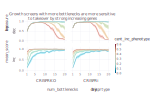

In [9]:
p = plot(grouped_info[grouped_info[:frac_inc] .== 0.02, :], 
x=:num_bottlenecks, y=:mean_score, ymax=:score_max, ymin=:score_min, 
xgroup=:crisprtype, ygroup=:measure, color=:cent_inc_phenotype,
Geom.subplot_grid(Geom.line, Geom.ribbon, Coord.cartesian(xmin=1, ymax=1, ymin=0),
Guide.xticks(ticks=[1,5,10,15,20])),
Guide.title("Growth screens with more bottlenecks are more sensitive\n to takeover by strong increasing genes"))
filename = "../plots/growth_screen_takeover_increasing_genes"
draw(SVG("$filename.svg", 15cm, 10cm), p)
p.theme = Theme(background_color = colorant"white")
draw(PNG("$filename.png", 15cm, 10cm, dpi=300), p)
draw(SVG(15cm, 10cm), p)